# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# Import Data

In [2]:
df = load_digits()

# Describe Data

In [3]:
print("Shape of loaded inputdataset: ", df.images.shape)
print("Shape of loaded output dataset; ", df.target.shape)
print("First input image: \n", df.images[0])

print("\nShape of images: ",df.images[0].shape)

print("\nTotal no. of samples: ",len(df.images))

Shape of loaded inputdataset:  (1797, 8, 8)
Shape of loaded output dataset;  (1797,)
First input image: 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Shape of images:  (8, 8)

Total no. of samples:  1797


# Data Visualization

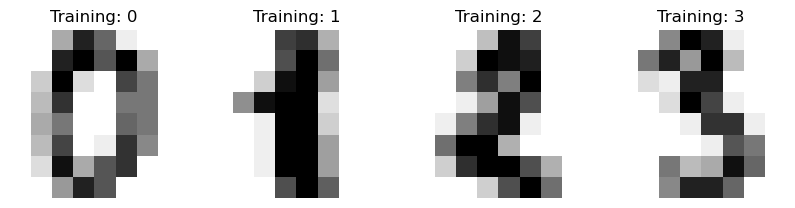

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols= 4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %1d" % label)

# Data Preprocessing

In [5]:
# Total number of samples in n_samples
n_samples = len(df.images)

# reshaping the input images into an array
data = df.images.reshape((n_samples, -1))

print("First image array: \n",data[0])
print("New data shape: ",data.shape)

print("\nMinimum value from dataset: ",data.min())
print("Maximum value from dataset: ",data.max())

# Normalization of data by dividing it from maximum value
data = data/16

print("\nMinimum value after normalization: ",data.min())
print("Maximum value after normalization: ",data.max())

print("\nFirst image array after normalization: \n",data[0])

First image array: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
New data shape:  (1797, 64)

Minimum value from dataset:  0.0
Maximum value from dataset:  16.0

Minimum value after normalization:  0.0
Maximum value after normalization:  1.0

First image array after normalization: 
 [0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.     0.     0.
 0.8125 0.9375 0.625  0.9375 0.3125 0.     0.     0.1875 0.9375 0.125
 0.     0.6875 0.5    0.     0.     0.25   0.75   0.     0.     0.5
 0.5    0.     0.     0.3125 0.5    0.     0.     0.5625 0.5    0.
 0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.     0.     0.125
 0.875  0.3125 0.625  0.75   0.     0.     0.     0.     0.375  0.8125
 0.625  0.     0.     0.    ]


# Define Target Variable (y) and Feature Variables(X)

In [6]:
# Defining feature variable X
X = data

# Defining Targer Variable 
y = df.target

# Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

X_train.shape: (1257, 64), X_test.shape: (540, 64), y_train.shape: (1257,), y_test.shape: (540,)


# Modeling

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Prediction

In [9]:
y_pred = rf.predict(X_test)
print(y_pred)

[4 1 7 6 5 6 3 3 9 7 6 9 0 9 6 5 3 2 7 3 1 4 7 6 1 8 4 6 8 4 6 0 6 2 4 5 5
 1 3 8 0 1 0 5 5 0 2 6 6 1 9 4 4 1 9 2 1 4 4 3 4 4 1 3 9 6 0 4 0 1 7 0 8 5
 0 7 4 1 2 5 8 9 8 3 5 9 6 2 1 6 7 5 2 0 9 3 8 0 0 1 9 1 4 3 4 4 4 4 7 9 2
 2 3 2 4 4 7 7 1 0 2 5 3 2 6 8 1 4 6 6 1 2 6 3 0 5 5 8 7 5 2 1 5 4 1 7 1 5
 5 4 4 0 9 4 9 3 2 9 6 6 2 9 2 4 6 6 4 5 0 2 5 6 0 9 7 5 7 1 3 0 2 5 0 8 5
 8 7 0 0 0 9 8 5 9 0 3 3 8 3 7 9 5 3 1 2 7 7 3 8 9 0 2 8 2 4 4 7 5 7 2 5 1
 9 5 2 2 2 8 7 1 3 2 2 1 0 3 5 0 2 1 7 9 6 5 5 8 2 7 4 4 2 9 5 8 9 9 7 3 2
 5 4 0 3 9 3 8 8 3 8 2 9 8 6 9 8 9 0 8 0 1 9 0 8 2 4 4 9 7 9 0 7 1 2 9 5 4
 3 5 7 9 7 8 9 7 4 1 0 6 3 4 1 3 0 8 2 3 3 4 1 4 2 1 4 5 9 6 3 6 8 1 8 3 4
 9 8 3 2 1 3 4 3 3 3 1 1 8 2 0 1 9 7 6 0 9 3 3 7 3 1 2 5 6 6 0 3 7 4 6 8 5
 9 0 7 3 9 9 9 1 1 9 9 8 5 5 8 4 2 9 1 2 4 3 1 9 3 9 1 2 8 1 5 0 7 5 1 1 9
 6 2 6 5 9 2 9 7 1 4 0 9 5 4 1 3 5 1 7 0 6 2 2 1 8 5 4 5 0 8 7 4 5 7 5 5 6
 8 8 3 3 7 2 4 1 2 6 6 7 2 4 2 1 7 5 4 1 5 8 0 0 7 7 6 4 0 3 3 0 1 3 0 9 2
 9 7 9 0 9 9 0 0 2 8 8 0 

# Model Evaluation

In [10]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Confusion matrix:
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  1 54  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  2]
 [ 0  0  0  0 53  0  0  2  0  0]
 [ 0  0  0  0  1 55  0  0  0  3]
 [ 1  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  1  0  0 46  0  0]
 [ 0  2  0  0  0  1  0  0 49  0]
 [ 0  1  0  0  0  2  0  0  0 58]]

Accuracy: 0.9685185185185186

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.93      1.00      0.97        56
           2       1.00      0.98      0.99        55
           3       1.00      0.96      0.98        55
           4       0.96      0.96      0.96        55
           5       0.95      0.93      0.94        59
           6       1.00      0.98      0.99        45
           7       0.96      0.98      0.97        47
           8       1.00      0.94      0.97        52
           9       0.92      0.95      0.94        61

 

# Loss Visualization

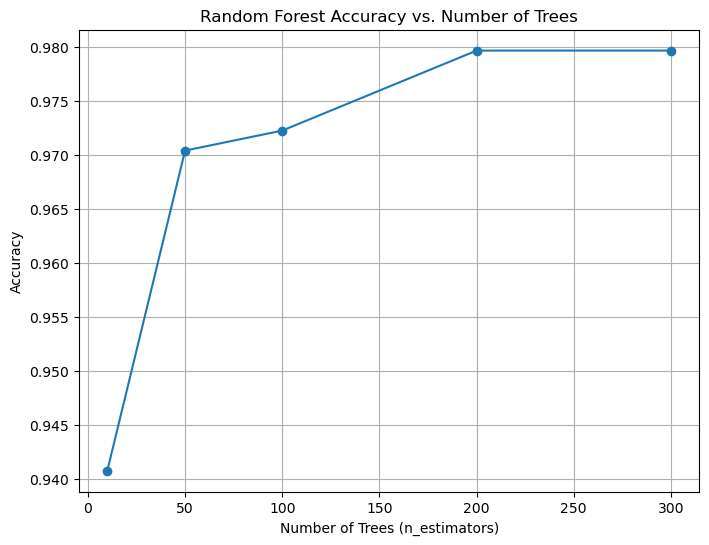

In [11]:
n_estimators_range = [10, 50, 100, 200, 300]
accuracy_scores = []

# Train and evaluate the model for each value of n_estimators
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Create a plot to visualize the accuracy vs. n_estimators
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Explaination

I've created a Random Forest Classifier to predict digits from the famous "digits" dataset using scikit-learn. This dataset consists of images of handwritten digits (0-9) and their corresponding labels. Here I provide you with an explanation of my code and the steps I've taken to create and evaluate the model.

1 Data Loading and Exploration:
    - I load the "digits" dataset using scikit-learn's load_digits() function.
    - I print the shape of the input and output datasets to understand their dimensions.
    - I display the first input image to get an idea of the data.

2 Data Preprocessing:
    - I check the shape of the first image and the total number of samples.
    - I create a 2D data array by reshaping the 8x8 images into 64-dimensional vectors.
    - I normalize the data by dividing it by 16, which scales the pixel values to the range [0, 1].

3 Train-Test Split:
    - I split the data into training and testing sets using the train_test_split function.

4 Random Forest Model:
    - I create a Random Forest Classifier (rf) and fit it to the training data (X_train, y_train).

5 Model Evaluation:
    - I make predictions on the test data using rf.predict(X_test) and store the predictions in y_pred.
    - I compute and display a confusion matrix to understand how many true positives, true negatives, false positives, and
    false negatives there are for each digit.
    - I calculate the accuracy of the model using accuracy_score and print it.
    - I generate a classification report that includes precision, recall, F1-score, and support for each digit class, and I
    print it.

6 Prediction:
    - I make predictions on new data (X_test) using the trained model and store the results in y_pred.